In [3]:
pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


최적의 파라미터 (MLE):
theta_0 (절편): 0.450856576649535
theta_1 (기울기): 0.41793833900487115
분산 (sigma^2): 0.7011311753472153
평균 제곱 오차 (MSE): 0.7011311502930844


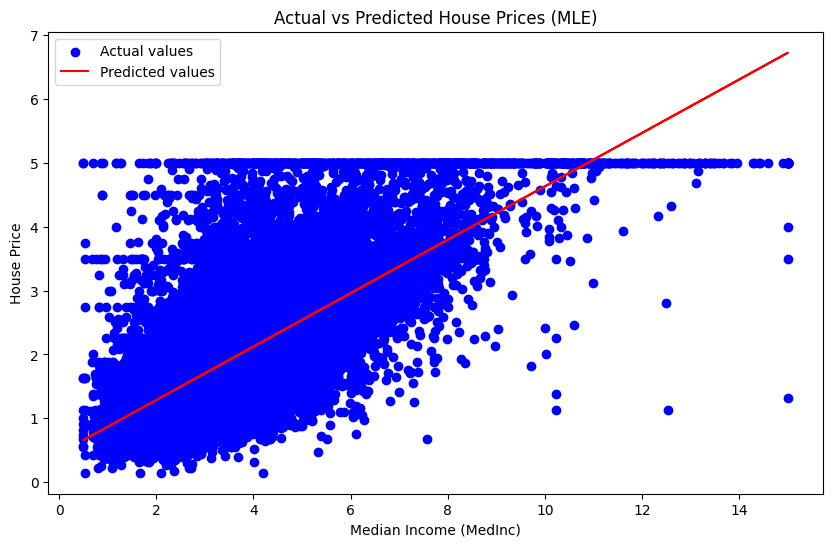

In [4]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: 캘리포니아 주택 데이터 로드
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

# 'MedInc' (Median Income)를 단일 변수로 설정
X = X[['MedInc']]

# Step 2: 편향(절편)을 위한 1의 열 추가
# np.c_를 사용하여 X에 1의 열을 추가하여 절편을 모델에 반영합니다.
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Step 3: 음의 로그 가능도(NLL) 함수 정의
def negative_log_likelihood(params, X, y):
    intercept, slope, sigma_sq = params
    n = len(y)

    # 선형 모델에서 예측값 계산
    y_pred = intercept + slope * X[:, 1]

    # 음의 로그 가능도 계산 (Task 2의 수식을 참고하세요)
    nll = (n / 2) * np.log(2 * np.pi * sigma_sq) + (1 / (2 * sigma_sq)) * np.sum((y - y_pred) ** 2)

    return nll

# 초기 파라미터 설정
initial_params = [0, 0, 1]

# Step 5: scipy를 사용하여 NLL 최소화 (최적의 파라미터 찾기)
result = minimize(negative_log_likelihood, initial_params, args=(X_b, y), method='L-BFGS-B', bounds=[(-10, 10), (-10, 10), (1e-5, None)])

# 최적의 파라미터 추출
optimal_params = result.x
theta_0, theta_1, sigma_sq_mle = optimal_params

# Step 6: 최적의 파라미터로 예측값 계산
y_pred = theta_0 + theta_1 * X_b[:, 1]

# Step 7: MSE 계산
mse = mean_squared_error(y, y_pred)

# Step 8: 결과 출력
print("최적의 파라미터 (MLE):")
print(f"theta_0 (절편): {theta_0}")
print(f"theta_1 (기울기): {theta_1}")
print(f"분산 (sigma^2): {sigma_sq_mle}")
print(f"평균 제곱 오차 (MSE): {mse}")

# Step 9: 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))

# 실제 값의 산점도
plt.scatter(X['MedInc'], y, color='blue', label='Actual values')
# 예측 값의 선 그래프
plt.plot(X['MedInc'], y_pred, color='red', label='Predicted values')

# 그래프 설정
plt.xlabel('Median Income (MedInc)')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices (MLE)')
plt.legend()
plt.show()
